# Chapter 3. 파이토치로 구현하는 ANN
----
## 1) 텐서와 Autograd
### (1) 텐서(Tensor)란 무엇인가?
텐서란, 파이토치에서 다양한 수식을 계산하는 데 사용하는 가장 기본적인 자료구조이다.<br>
텐서에는 차원(랭크)라는 개념이 있다.<br>
- 랭크 0 : 스칼라
- 랭크 1 : 벡터
- 랭크 2 : 2차원 행렬
- 랭크 3 이상 : 3차원 이상 행렬

### 텐서 정의하기

In [1]:
import torch

In [16]:
# 0차원 텐서 = 스칼라
q = torch.tensor(1)
print(q)

tensor(1)


In [15]:
# 1차원 텐서 = 벡터
p = torch.tensor([1,2,3])
print(p)

tensor([1, 2, 3])


In [27]:
# 2차원 텐서 = 2차원 행렬
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [13]:
# 3차원 텐서 = 다차원 행렬
y = torch.tensor([[[1,2,3],[7,8,9]],[[1,2,3],[7,8,9]],[[1,2,3],[7,8,9]]]) # 각 열의 요소 수가 다르면 에러 발생
print(y)

tensor([[[1, 2, 3],
         [7, 8, 9]],

        [[1, 2, 3],
         [7, 8, 9]],

        [[1, 2, 3],
         [7, 8, 9]]])


### 텐서 정보 확인, 수정하기
텐서 정보 확인
- t.size(), t.shape
- t.ndimension()

In [49]:
def printTensor(t):
    print("Size: ", t.size())
    print("Shape: ", t.shape)
    print("Dimension: ", t.ndimension())

In [20]:
printTensor(y)

Size:  torch.Size([3, 2, 3])
Shape:  torch.Size([3, 2, 3])
Dimension:  3


In [21]:
# torch.unsqueeze(tensor, index) : i번째 자리에 차원값 1을 추가한다. 따라서 해당 텐서는 차원이 1 증가한다.
modified_y = torch.unsqueeze(y, 0)
printTensor(modified_y)

Size:  torch.Size([1, 3, 2, 3])
Shape:  torch.Size([1, 3, 2, 3])
Dimension:  4


In [23]:
# torch.squeeze(tesnsor) : 크기가 1인 랭크를 삭제한다. 1인 랭크가 없으면 변화 없음.
modified_y = torch.squeeze(modified_y)
printTensor(modified_y)

Size:  torch.Size([3, 2, 3])
Shape:  torch.Size([3, 2, 3])
Dimension:  3


In [30]:
# tensor.view(n) : 랭크 1의(1차원 벡터) [n]모양으로 바꾸는 함수. 
print(x);
modified_x = x.view(9)
print(modified_x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [31]:
# 이때, n은 반드시 요소의 개수와 일치해야 한다. 크거나 작으면 에러.
try:
    modified_x = x.view(2,4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


### 정리
텐서를 수정하는 함수들은 기존에 존재하던 요소를 건들이지 않으면서 텐서의 모양만 수정한다.<br>
따라서 기존 요소를 지우거나, 허용되지 않은 방법으로 요소를 늘린다면 에러가 발생한다.
- torch.squeeze(tensor, index) : i번째 자리에 크기가 1인 차원을 하나 추가한다.
- torch.unsqueeze(tensor) : 크기가 1인 차원을 삭제한다.
- tensor.view(num of element) : 다차원 행렬을 1차원 벡터로 변환한다. 파라미터는 반드시 요소의 개수와 일치해야 한다.

### (2) 텐서를 이용한 연산과 행렬곱
### 행렬곱
a, b라는 행렬로 행렬곱을 하려면 다음 조건이 성립해야 한다.
- a의 열 수와 b의 행 수는 같아야 한다.
- 행렬곱 a`*`b의 결과 행렬의 행 개수는 a, 열 개수는 b와 같다.

#### 행렬 정의하기
행렬w : 정규분포에서 무작위로 값을 뽑아 텐서를 생성하는 randn함수를 이용하여 5x3의 shape를 가진 텐서.<br>
행렬x : 실수형 원소들을 직접 넣어 3x2의 shape를 가진 텐서.
- torch.randn(a, b, dtype=torch.type) : a`*`b shape를 가진 type형 텐서를 랜덤하게 생성하는 함수.

In [51]:
w  = torch.randn(5, 3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0],[3.0, 4.0],[5.0, 6.0]])
print("w:",w)
print("x:",x)

w: tensor([[-0.0900,  0.8526, -0.0104],
        [ 1.4684, -2.0092,  0.1427],
        [ 0.3965, -1.1503, -0.1248],
        [-1.9296, -1.2552,  0.5724],
        [ 1.4546, -0.5352, -0.3728]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [45]:
print("w:",w)

w: tensor([[ 0.2971, -0.7423,  1.0410],
        [ 0.3600,  0.9063, -0.3170],
        [-0.2004,  1.6428, -0.0296],
        [ 1.7403,  0.1789, -2.0311],
        [ 0.4068, -1.9636,  1.0907]])


In [44]:
b = torch.randn(5, 2, dtype=torch.float)
printTensor(b)
print("b:", b)

Size:  torch.Size([5, 2])
Shape:  torch.Size([5, 2])
Dimension:  2
b: tensor([[-0.3968,  0.2361],
        [-0.3162, -0.1926],
        [ 0.1883, -1.6577],
        [-0.1288,  0.2252],
        [-0.0247, -0.0826]])


#### 연산 수행하기

In [43]:
# torch.mm(a,b) : 행렬곱 함수
wx = torch.mm(w,x) #w[5,3], x[3,2] 따라서 행렬곱 조건을 만족한다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ 3.2752,  3.8710],
        [ 1.4941,  2.4435],
        [ 4.5798,  5.9925],
        [-7.8787, -7.9907],
        [-0.0302, -0.4963]])


In [52]:
# a + b : 행렬 덧셈
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[ 2.8784,  4.1071],
        [ 1.1779,  2.2508],
        [ 4.7681,  4.3348],
        [-8.0075, -7.7655],
        [-0.0550, -0.5789]])


### (3) Autograd를 이용한 경사하강법
 - __distance__ : 데이터에 대한 정답(ground truth)과 머신러닝 모델이 예측한 결과의 차이를 산술적으로 표현한 것
 - __loss__ : 학습 데이터로 계산한 거리들의 평균
 loss가 작은 모델일수록 주어진 데이터에 대해 더 정확한 답을 낸다고 볼 수 있다.<br>
 이러한 loss를 최소화하는 데에 쓰이는 대표적인 알고리즘이 __경사하강법(gradient descent)__이다.
 - __gradient descent__ : loss 함수를 미분한 후 기울기가 최소가 되는 지점을 찾아내는 알고리즘
 
 즉, gradient descent 기법을 사용하기 위해선 미분이 필요한데, pytorch의 __Autograd__는 미분 계산을 자동화 하여 수고를 덜어준다.

tensor를 정의할 때 requires_grad 값을 True로 설정하면 파이토치의 Autograd 기능이 활성화 되며<br>
자동으로 w에 대한 미분값을 w.grad에 저장한다.

In [2]:
w = torch.tensor(1.0, requires_grad=True)

In [3]:
a = w*3

In [6]:
l = a**2 # (w*3)^2 = 9*w^2

In [7]:
#l을 w에 대해 미분
l.backward()
print('l을 w로 미분한 값은 {}'.format(w.grad))

l을 w로 미분한 값은 18.0


## 2) 경사하강법으로 이미지 복원하기
### (1) 오염된 이미지 문제
이미지 처리를 위해 만들었던 weird_function() 함수에 실수로 버그가 들어갔고, 원본 이미지를 해당 함수에 투입시켜<br>
100x100 픽셀의 오염된 이미지가 만들어졌다. 원본 이미지는 삭제된 상태이며, weird_function() 함수의 소스코드는 남아있다.<br>

- 문제 해결 알고리즘(?)
1. weird_function()의 동작을 반대로 수행하는 복원 함수를 만든다.
2. 복원 함수에 오염된 이미지를 투입시켜 원본 이미지를 구한다.

위 알고리즘은 이론적으로는 정석이지만, 실제로는 매우 어렵다.따라서 머신러닝과 수학적 최적화에 더 가까운 방법을 사용해야 한다.

---
- __머신러닝을 활용한 문제 해결 알고리즘__
1. 오염된 이미지와 크기가 같은 __텐서 x__를 생성한다.
2. x를 weird_function()에 입력하여 오염된 이미지 __y__를 만들어낸다.
3. 만약 y가 오염된 이미지와 같다면, 오염된 이미지의 원본은 x와 같다.<br>
즉, __weird_function(x) = broken_image__ 관계가 성립해야 한다. 여기에 경사하강법을 이용하여<br> 
weird_function(x)과 broken_image와의 __오차가 최소가 되는 지점__을 구할 수 있으며,해당 지점이 원본 이미지이다.

In [33]:
import torch
import pickle # 오염된 이미지 파일을 로딩하는 데 사용할 라이브러리
import matplotlib.pyplot as plt

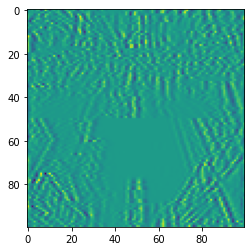

In [34]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100, 100))

In [35]:
# 버그가 있는 함수
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0 * 0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [36]:
# weird_function(x) = y와 broken_image 사이의 loss를 구하는 함수
def distance_loss(y, broken_image):
    return torch.dist(y, broken_image)

In [37]:
# 100 * 100 행렬이 1차원 벡터 모양으로 표현된 텐서
random_tensor = torch.randn(10000, dtype=torch.float)

In [38]:
# learning rate : 경사하강법에서 한 이터레이션을 수행할 때 이동할 거리
lr = 0.8

경사하강법에서 learning rate가 너무 크면 최소점을 지나칠 수 있고, 너무 작으면 학습 속도가 느려진다.

In [40]:
# 경사하강법 구현
for i in range(0, 20000):  # 경사하강법을 20000번 수행
    random_tensor.requires_grad_(True)
    y = weird_function(random_tensor) # random_tensor를 에러 함수에 집어넣어 생성한 '가설'
    loss = distance_loss(y, broken_image) # 가설과 정답의 loss를 계산
 
    # autograd 를 사용하여 역전파 단계를 계산한다. 
    # 이는 requires_grad=True를 갖는 모든 텐서들에 대한 손실의 변화도를 계산한다.
    loss.backward()
        
    # 파이토치의 자동 기울기 계산 비활성화
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad 
        # loss가 최대가 되는 지점의 반대 방향으로 random_tensor를 lr만큼 이동시킨다.
    if i % 1000 == 0:
        print('Loss at {} = {}'. format(i, loss.item()))

Loss at 0 = 12.25673770904541
Loss at 1000 = 1.1336250305175781
Loss at 2000 = 0.5327885150909424
Loss at 3000 = 0.36475613713264465
Loss at 4000 = 0.2856989800930023
Loss at 5000 = 0.23746511340141296
Loss at 6000 = 0.2034732550382614
Loss at 7000 = 0.17689889669418335
Loss at 8000 = 0.15449033677577972
Loss at 9000 = 0.13460512459278107
Loss at 10000 = 0.11635971814393997
Loss at 11000 = 0.09924431890249252
Loss at 12000 = 0.08294638991355896
Loss at 13000 = 0.0672638788819313
Loss at 14000 = 0.05206169933080673
Loss at 15000 = 0.03724765405058861
Loss at 16000 = 0.022760052233934402
Loss at 17000 = 0.02116250805556774
Loss at 18000 = 0.021166492253541946
Loss at 19000 = 0.021167250350117683


이터레이션 단계가 증가하면서 loss가 점점 줄어드는 것을 알 수 있다.

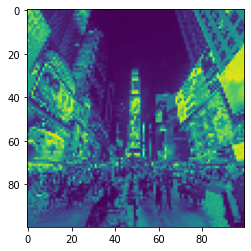

In [41]:
plt.imshow(random_tensor.view(100, 100).data)

## 3) 신경망 모델 구현하기
인공신경망은 입력층, 은닉층, 출력층으로 이루어져있다. 각 층 사이에는 데이터의 전달이 이루어지는데, 이때 출력 데이터를 생성하는 과정에서 가중치와 편향을 적절하게 적용한다.
- 가중치(weight) : 입력 데이터가 출력에 주는 영향을 계산하는 매개변수. 입력데이터와 행렬곱을 수행한다.
- 편향(bias) : 각 노드가 얼마나 데이터에 민감한지 알려주는 매개변수<br>
이 행렬곱의 결과는 활성화 함수(activation function)을 거쳐 인공뉴런의 결괏값을 산출하게 된다.

인공 신경망이 출력한 값과 정답을 비교하여 오차를 계산해야 하며, 이 오차를 기반으로 신경망 전체를 학습시키려면<br> 
출력층부터 입력층까지의 가중치를 점진적으로 업데이트 해야 한다. 이것이 바로 __역전파(Backpropagation) 알고리즘__이다.

### 간단한 분류모델 예제

1. 라이브러리 import

In [1]:
import torch
import numpy # 행렬과 벡터 연산에 유용한 수치 해석 라이브러리
from sklearn.datasets import make_blobs # 머신러닝 라이브러리
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리

2. 학습 데이터 생성 (train/test 데이터셋 비율은8:2)<br>
sklearn의 make_blobs() 함수를 사용하여 데이터를 2차원 벡터 형태로 만든다.
- make_blobs()의 레이블 데이터([]) : 각 데이터가 위치할 클러스터(레이블). 레이블은 자동으로 0부터 1씩 증가하며 인덱싱 된다.<br>
아래의 샘플 데이터에는 각 데이터셋마다 4개의 레이블을 가지며, 인덱스는 순서대로 0, 1, 2, 3이다.

In [2]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

모델의 단순화를 위해 레이블 축소

In [3]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_ # y 데이터셋의 from 레이블 데이터들을 to 레이블로 변경한다.
    return y

In [4]:
# 4개의 레이블에서 2개의 레이블로 축소
y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

In [5]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

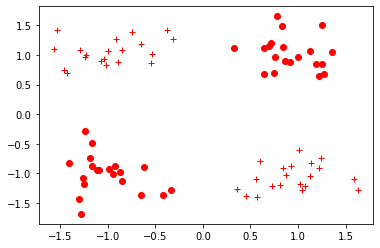

In [6]:
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

데이터를 넘파이 벡터 형식에서 파이토치 텐서로 변환

In [7]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


---
__3. 신경망 모델 구현__<br>
파이토치에서 신경망은 보통 신경망 모듈(torch.nn.Module)을 상속받는 클래스로 정의한다.<br>

---
(1) `__init__()` | 초기화 함수
- __super(NeuralNet, self)__ : NeuralNet 클래스는 파이토치의 `nn.Module` 클래스의 속성들을 가지고 초기화된다.
- __input_size__ : 신경망에 입력되는 데이터의 차원
- __hidden_size__ : 신경망의 은닉층 차원
- __torch.nn.Linear()__ : 행렬곱과 편향을 포함하는 연산을 지원하는 객체를 반환하는 함수
- __ReLU(), Sigmoid()__ : 활성함수
---
(2) `forward()` | init에서 정의한 연산들을 차례대로 실행하는 함수
- __linear_1__ : 입력 데이터에 [input_size, hidden_size] 크기의 가중치를 행렬곱한 후 편향을 더해 [1, hidden_size] 꼴의 텐서를 반환한다.<br>
이후 위 텐서에 `ReLU()` 활성화 함수를 적용한다.
- __ReLU()__ : 입력값이 0보다 작으면 0을, 0보다 크면 입력값을 그대로 출력한다.<br>
예를 들어 텐서[-1, 3, -5, -7]이 `ReLu()` 함수를 통과하면 [0, 3, 0 , 0]이 반환된다.<br>
고 그 결과를 다시 `linear_2()` 함수에 전달하여 연산을 수행한다. 그 결과 텐서는 [1,1]꼴로 변환된다. 마지막으로 이 텐서를 `Sigmoid()` 함수에 통과시킨다.
- __Sigmoid()__ : 입력값을 0과 1 사이의 임의의 수로 제한해주는 함수. `ReLU`와는 달리 이분법적이지 않고, 0과 1 중 어디에 더 가까운지 표현한다.

In [8]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        # 클래스 초기화
            super(NeuralNet, self).__init__()
        
        # 차원 초기화
            self.input_size = input_size
            self.hidden_size  = hidden_size
        
        # 입력 데이터가 NN을 통과하면서 거치는 연산을 정의
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)
            return output

4. 학습에 사용할 변수와 알고리즘 정의

In [9]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

5. 모델 학습 및 성능 시험

In [10]:
# 학습 전 loss
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7329143285751343


In [11]:
# 신경망 학습
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7305234670639038
Train loss at 100 is 0.6592234373092651
Train loss at 200 is 0.5971575975418091
Train loss at 300 is 0.504254937171936
Train loss at 400 is 0.4033142626285553
Train loss at 500 is 0.3198634088039398
Train loss at 600 is 0.2565322816371918
Train loss at 700 is 0.20927806198596954
Train loss at 800 is 0.1733916997909546
Train loss at 900 is 0.14671467244625092
Train loss at 1000 is 0.12596376240253448
Train loss at 1100 is 0.10942854732275009
Train loss at 1200 is 0.09574174880981445
Train loss at 1300 is 0.08420918881893158
Train loss at 1400 is 0.07441233843564987
Train loss at 1500 is 0.06604799628257751
Train loss at 1600 is 0.058904699981212616
Train loss at 1700 is 0.052804846316576004
Train loss at 1800 is 0.047591786831617355
Train loss at 1900 is 0.04312794655561447


In [12]:
# 학습 후 loss
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('After Training, test loss is {}'.format(test_loss_before.item()))

After Training, test loss is 0.041869863867759705


In [13]:
# 학습을 하기 전과 비교했을때 현저하게 줄어든 오차값을 확인 하실 수 있습니다.
# 지금까지 인공신경망을 구현하고 학습시켜 보았습니다.
# 이제 학습된 모델을 .pt 파일로 저장해 보겠습니다.

torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.4000, -1.8816],
        [ 0.0805,  0.3859],
        [-1.4725, -1.2909],
        [-2.0156,  1.3788],
        [ 0.2682, -0.0852]])), ('linear_1.bias', tensor([-0.2292,  0.8322, -0.0346, -0.2913, -0.5306])), ('linear_2.weight', tensor([[ 2.3263, -0.7238, -1.7677,  2.3624, -0.4193]])), ('linear_2.bias', tensor([-1.9082]))])


In [14]:
# `save()` 를 실행하고 나면 학습된 신경망의 가중치를 내포하는 model.pt 라는 파일이 생성됩니다. 아래 코드처럼 새로운 신경망 객체에 model.pt 속의 가중치값을 입력시키는 것 또한 가능합니다.

new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9871225357055664
